Problem 1

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
start_date = '2023-04-01'
end_date = '2024-03-31'
data = yf.download( 'TCS.NS', start = start_date, end = end_date)
data1 = yf.download( '^NSEI', start = start_date, end = end_date)
initial_capital = 100000

[*********************100%%**********************]  1 of 1 completed

C:\Users\nonit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed


C:\Users\nonit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [2]:
def dataframe(data):
    data['Change'] = np.nan
    data['Amount'] = np.nan
    data['Percent'] = np.nan
    data['Returns'] = np.nan
    len = data.shape[0]
    capital = initial_capital
    for i in range(len):
        data.Amount.iloc[i] = capital
        data.Change.iloc[i] = (capital/data.Open.iloc[i])*(data.Close.iloc[i]-data.Open.iloc[i])
        capital = capital + data.Change.iloc[i]
    data['Returns'] = data['Amount'].diff()
    for i in range(len-1):
        data.Percent.iloc[i+1] = data.Returns.iloc[i+1]/data.Amount.iloc[i]*100
    return capital

In [3]:
capital = dataframe(data)
capital1 = dataframe(data1)

C:\Users\nonit\AppData\Local\Temp\ipykernel_19864\2178168921.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Amount.iloc[i] = capital
C:\Users\nonit\AppData\Local\Temp\ipykernel_19864\2178168921.py:9: SettingWithCopyWarning: 
A valu

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume,Change,Amount,Percent,Returns
Date,,,,,,,,,,
2023-04-03,3224.949951,3224.949951,3173.750000,3200.000000,3145.387207,1521830,-773.653903,100000.000000,NaN,NaN
2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3184.508057,2655065,1691.412789,99226.346097,-0.773654,-773.653903
2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3165.734131,1703464,-134.558540,100917.758885,1.704600,1691.412789
2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3207.705566,2203187,1358.379209,100783.200346,-0.133335,-134.558540
2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3158.952148,2348779,-1570.925952,102141.579555,1.347823,1358.379209
...,...,...,...,...,...,...,...,...,...,...
2024-03-21,3990.050049,4008.399902,3948.000000,3972.949951,3972.949951,3829582,-479.501920,111884.545763,-0.378828,-425.462139
2024-03-22,3897.000000,3938.000000,3855.000000,3910.899902,3910.899902,5852485,397.361876,111405.043843,-0.428569,-479.501920
2024-03-26,3875.000000,3946.699951,3871.449951,3877.500000,3877.500000,3440925,72.130584,111802.405719,0.356682,397.361876


a) Her final capaital

In [5]:
print(f"Final Capital: {capital:.2f}")

Final Capital: 111257.04


b) i) Daily Returns

In [6]:
for i in range(data.shape[0]):
    print(f'Returns for day {i+1} are: {data.Change.iloc[i]/data.Amount.iloc[i]*100:.2f} %')

Returns for day 1 are: -0.77 %
Returns for day 2 are: 1.70 %
Returns for day 3 are: -0.13 %
Returns for day 4 are: 1.35 %
Returns for day 5 are: -1.54 %
Returns for day 6 are: 0.42 %
Returns for day 7 are: -0.66 %
Returns for day 8 are: 0.17 %
Returns for day 9 are: -0.77 %
Returns for day 10 are: -1.31 %
Returns for day 11 are: 0.48 %
Returns for day 12 are: 1.64 %
Returns for day 13 are: 0.75 %
Returns for day 14 are: -0.22 %
Returns for day 15 are: 0.54 %
Returns for day 16 are: 0.09 %
Returns for day 17 are: 0.59 %
Returns for day 18 are: -0.48 %
Returns for day 19 are: -1.12 %
Returns for day 20 are: 1.28 %
Returns for day 21 are: 0.33 %
Returns for day 22 are: 0.17 %
Returns for day 23 are: 0.94 %
Returns for day 24 are: -0.10 %
Returns for day 25 are: -0.81 %
Returns for day 26 are: -0.15 %
Returns for day 27 are: -0.88 %
Returns for day 28 are: 0.06 %
Returns for day 29 are: -1.45 %
Returns for day 30 are: -0.81 %
Returns for day 31 are: 0.40 %
Returns for day 32 are: 2.13 %
Re

b) ii) Maximum Drawdown

In [7]:
x = data.Amount.idxmin()
y = data.loc[:x,'Amount']
mdd = (min(y)-max(y))/(max(y))*100
print(f'Maximum Drawdown: {mdd:.2f} %')

Maximum Drawdown: -6.83 %


b) iii) Sharpe Ratio

In [8]:
Rf = 6
Rp = (capital-initial_capital)/initial_capital*100
z = data.Percent.std()
sr = (Rp-Rf)/z 
print(f'Sharpe Ratio: {sr:.2f}')

Sharpe Ratio: 4.99


c) Metrics for the Nifty 50 index

i) Final Capital

In [9]:
print(f"Final Capital: {capital1:.2f}")

Final Capital: 96936.09


ii) Maximum Drawdown

In [10]:
x1 = data1.Amount.idxmin()
y1 = data1.loc[:x1,'Amount']
mdd1 = (min(y1)-max(y1))/(max(y1))*100
print(f'Maximum Drawdown: {mdd1:.2f} %')

Maximum Drawdown: -7.96 %


iii) Sharpe Ratio

In [11]:
Rf = 6
Rp1 = (capital1-initial_capital)/initial_capital*100
z1 = data1.Percent.std()
sr1 = (Rp1-Rf)/z1 
print(f'Sharpe Ratio: {sr1:.2f}')

Sharpe Ratio: -17.13


iv) Daily Returns

In [12]:
for i in range(data1.shape[0]):
    print(f'Returns for day {i+1} are: {data1.Change.iloc[i]/data1.Amount.iloc[i]*100:.2f} %')

Returns for day 1 are: -0.17 %
Returns for day 2 are: 0.77 %
Returns for day 3 are: 0.37 %
Returns for day 4 are: -0.06 %
Returns for day 5 are: 0.10 %
Returns for day 6 are: 0.30 %
Returns for day 7 are: 0.12 %
Returns for day 8 are: -0.87 %
Returns for day 9 are: -0.60 %
Returns for day 10 are: -0.20 %
Returns for day 11 are: -0.08 %
Returns for day 12 are: -0.09 %
Returns for day 13 are: 0.20 %
Returns for day 14 are: 0.04 %
Returns for day 15 are: 0.26 %
Returns for day 16 are: 0.57 %
Returns for day 17 are: 0.64 %
Returns for day 18 are: 0.13 %
Returns for day 19 are: -0.13 %
Returns for day 20 are: 0.97 %
Returns for day 21 are: -0.27 %
Returns for day 22 are: 0.79 %
Returns for day 23 are: -0.20 %
Returns for day 24 are: 0.01 %
Returns for day 25 are: -0.33 %
Returns for day 26 are: 0.22 %
Returns for day 27 are: 0.32 %
Returns for day 28 are: -0.79 %
Returns for day 29 are: -0.65 %
Returns for day 30 are: -0.86 %
Returns for day 31 are: 0.09 %
Returns for day 32 are: 0.62 %
Ret

d) Plot of capital vs time

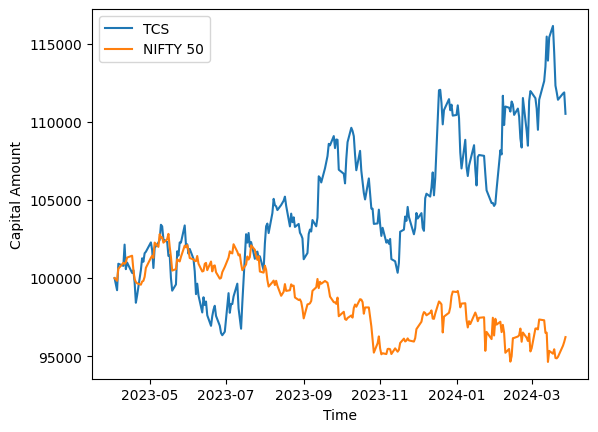

In [13]:
plt.plot(data.Amount , label = 'TCS')
plt.plot(data1.Amount , label = 'NIFTY 50')
plt.xlabel('Time')
plt.ylabel('Capital Amount')
plt.legend()
plt.show()

e) 

The TCS stock is a much better option, as it is way more stable and at the same time it is producing better results